In [2]:
# Importing Important Libraries:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Displaying all columns
pd.set_option('display.max_columns',None)

In [4]:
# Loading the data
df = pd.read_csv("./SuperStore_Sales_Dataset.csv")

In [5]:
# Display the first five rows
df.head(5)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


## Data Cleaning and Preprocessing:

In [6]:
# Number of rows and columns:
df.shape

(5901, 23)

In [7]:
# Checking for duplicates:
df.duplicated().sum()

0

In [8]:
# Column names in the df:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1',
       'ind2'],
      dtype='object')

In [9]:
# Removing empty columns:
rem = ['Row ID+O6G3A1:R6','ind1', 'ind2']
df.drop(columns = rem, inplace = True)

In [10]:
# Checking for nulls:
df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns          5614
Payment Mode        0
dtype: int64

In [11]:
# Filling the nulls Retuns with 0:
df['Returns'].fillna(0, inplace=True)

In [12]:
# Checking the datatype:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Profit           float64
Returns          float64
Payment Mode      object
dtype: object

In [13]:
# Changing datatype of Order Date to datetime format:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

In [14]:
# Changing datatype of Ship Date to datetime format:
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True)

## Data Exploration

### Uni-Variate Analysis

### Statistical Summary

In [15]:
# Statistical Summary of numerical columns:
df.describe()

,Sales,Quantity,Profit,Returns
count,5901.000000,5901.000000,5901.000000,5901.000000
mean,265.345589,3.781901,29.700408,0.048636
std,474.260645,2.212917,259.589138,0.215124
min,0.836000,1.000000,-6599.978000,0.000000
25%,71.976000,2.000000,1.795500,0.000000
50%,128.648000,3.000000,8.502500,0.000000
75%,265.170000,5.000000,28.615000,0.000000
max,9099.930000,14.000000,8399.976000,1.000000


In [16]:
# Statistical Summary of categorical columns:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Payment Mode
count,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901
unique,3003,4,773,773,3,1,452,49,4,1755,3,17,1742,3
top,CA-2020-100111,Standard Class,EP-13915,Emily Phan,Consumer,United States,New York City,California,West,TEC-AC-10003832,Office Supplies,Binders,Easy-staple paper,COD
freq,14,3451,27,27,2997,5901,563,1189,1901,15,3569,915,27,2453


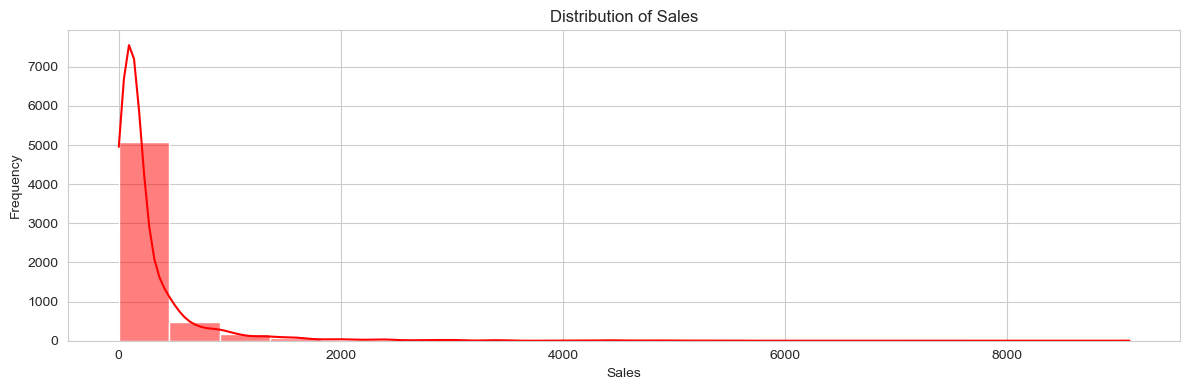

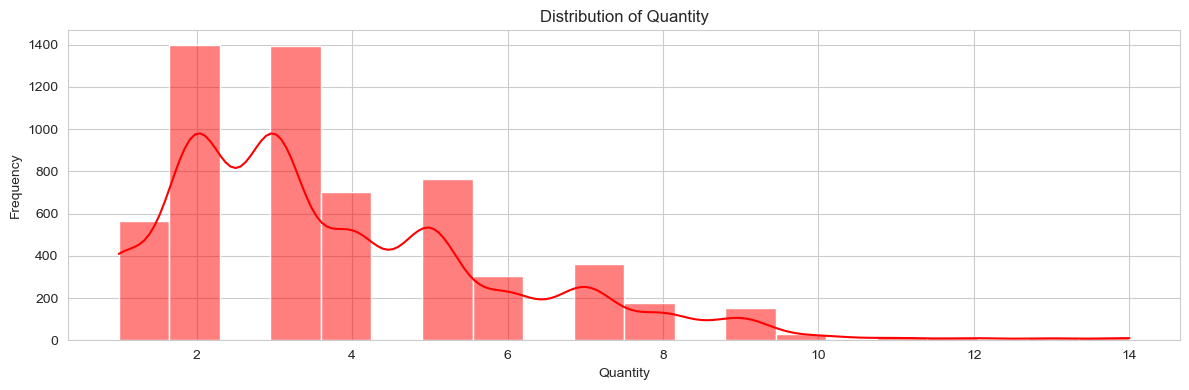

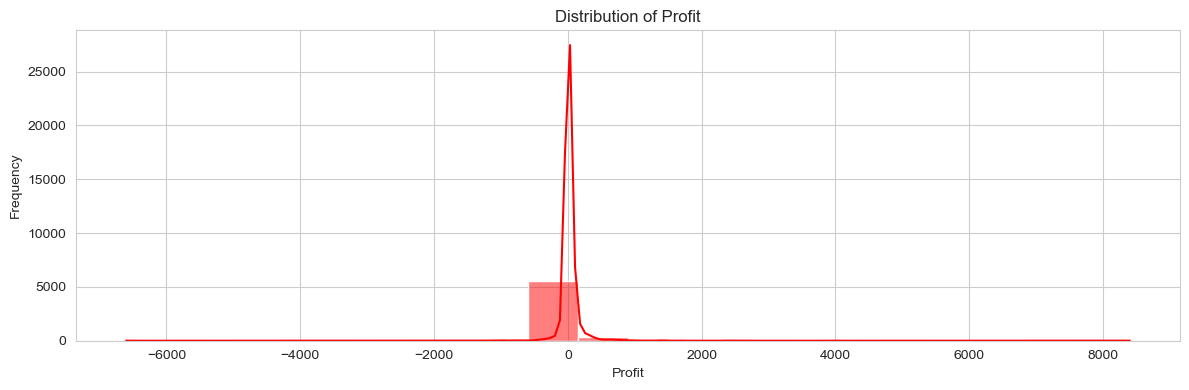

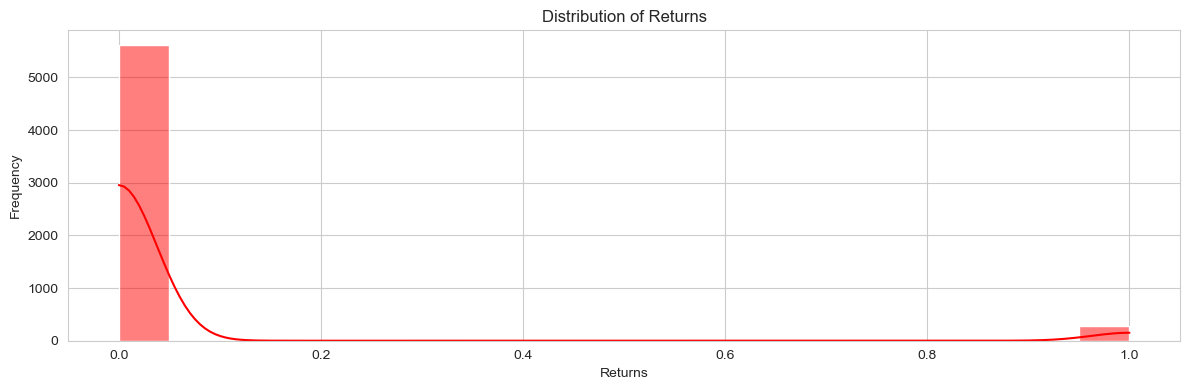

In [17]:
# Distribution plots for numeric variables
num_columns = df.select_dtypes(include='number')

for col in num_columns.columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True, color = 'r')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Bi-Variate Analysis:

<Figure size 4000x1000 with 0 Axes>

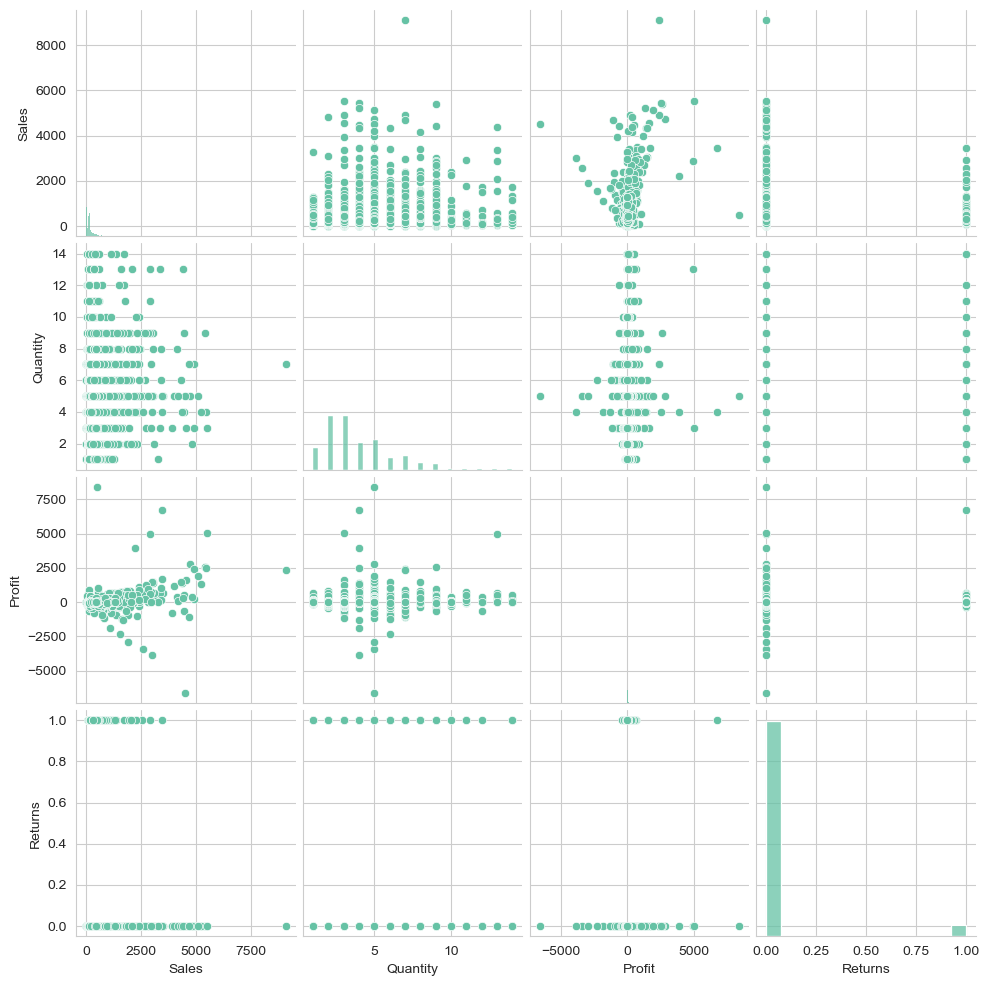

In [79]:
# Pair plot
plt.figure(figsize=(40,10))
plt.suptitle('Pairplot of Numerical Variables')
sns.pairplot(df)

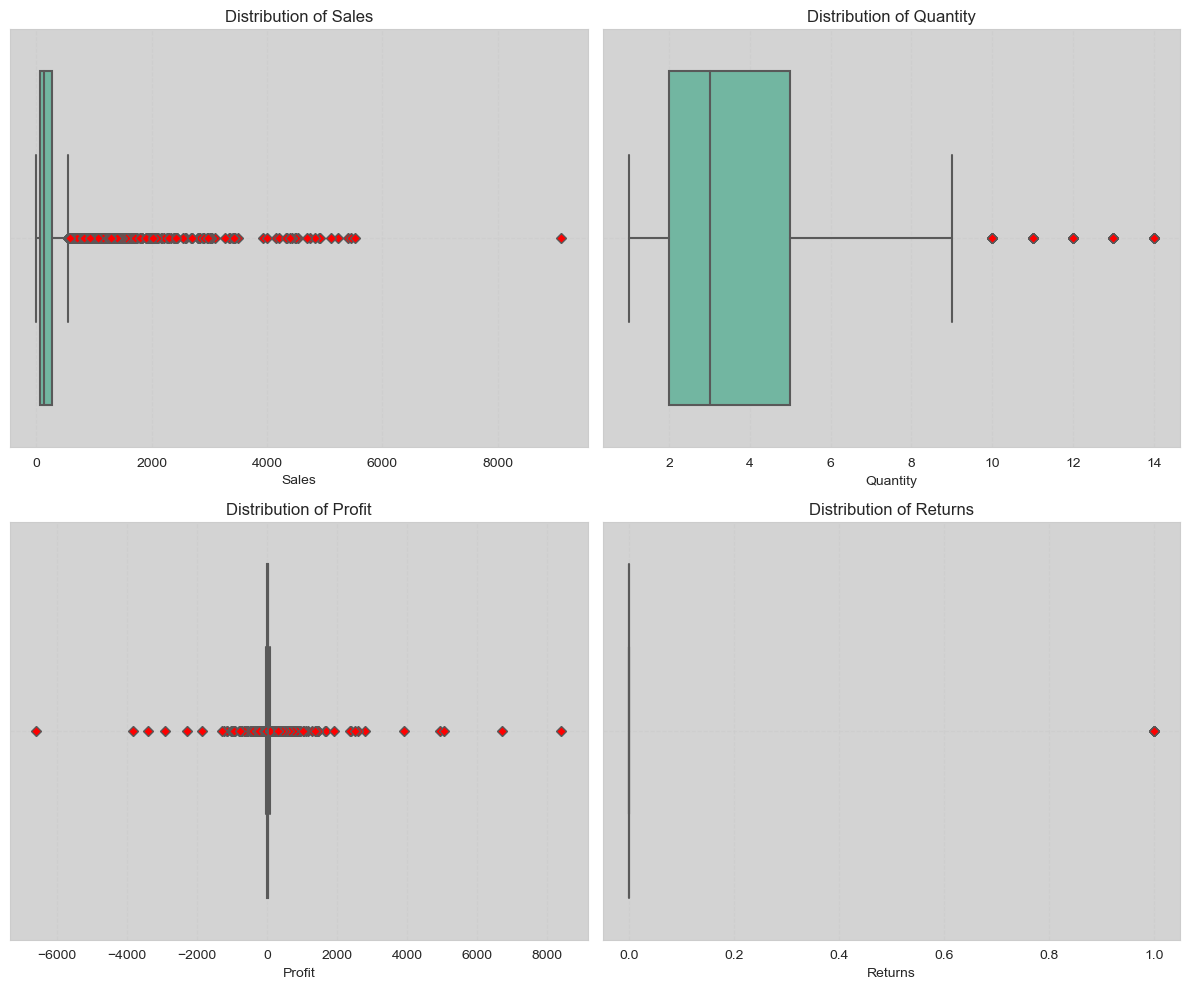

In [19]:
# Box plot for numeric variables to visualize outliers
num_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 10))
for i in range(len(num_columns)):
    col = num_columns[i]
    plt.subplot(2, 2, i + 1, facecolor='lightgray')  # Adjust the subplot number
    sns.boxplot(data=df, x=col, flierprops=dict(markerfacecolor='red', marker='D'))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

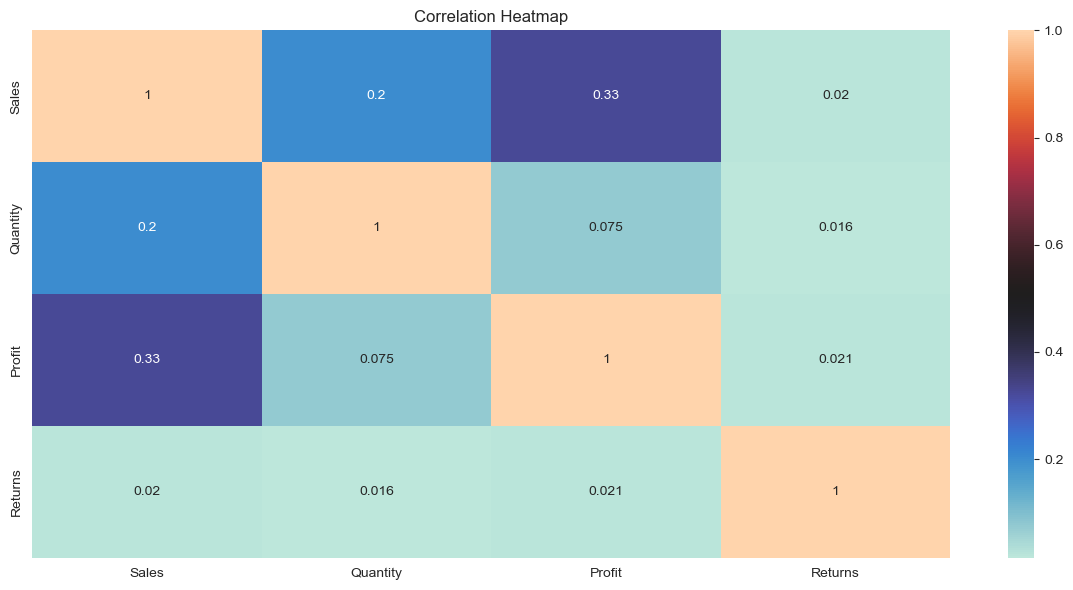

In [20]:
# Correlation HeatMap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='icefire')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Key Metrics:

#### Number of unique Customers

In [21]:
# Customers:
df['Customer ID'].nunique()

773

#### Total Unique Products Sold

In [22]:
# Products:
df['Product ID'].nunique()

1755

#### Total Orders Processed

In [23]:
# Orders:
df['Order ID'].nunique()

3003

#### Total Quantity ordered

In [24]:
# Quantity ordered:
df['Quantity'].sum()

22317

#### Total Returns Issued

In [25]:
df.Returns.unique()

array([0., 1.])

In [26]:
# Return:
len(df[df['Returns'] == 1])

287

#### Total Sales Revenue


In [27]:
#### Total Sales Revenue
round(df['Sales'].sum(),0)

1565804.0

#### Total Profit Earned

In [28]:
# Profit :
round(df['Profit'].sum(),0)

175262.0

#### Average order value

In [29]:
# average_order_value:
df.groupby('Order ID')['Sales'].sum().mean()

521.413361038961

#### Highest and lowest sales transactions

In [30]:
# Highest sales transaction:
df['Sales'].max()

9099.93

In [31]:
# Lowest sales transaction:
df['Sales'].min()

0.836

### Summary of Key Metrics:

- Number of unique Customers: [773]
- Total Unique Products Sold: [1755]
- Total Orders Processed: [3003]
- Total Quantity ordered: [22317]
- Total Return Issued: [287]

- Total Sales Revenue: [156.6 k]
- Total Profit Earned: [175.3 k]
- Average Order Value: [521]
- Highest Sales Transaction: [9100]
- Lowest Sales Transaction: [0.8]

## Key metrics and Statistical Summary Insights

### The statistical summary and key metrics provide a comprehensive understanding of the dataset, highlighting essential aspects such as sales, profit, and returns. These metrics aid in identifying trends and patterns crucial for data-driven decision-making.

## Time-Series Analysis

### Shipping Time Analysis:

In [32]:
# Shipping time for each order:
df['Ship Date'] - df['Order Date']

0      6 days
1      5 days
2      5 days
3      2 days
4      5 days
        ...  
5896   4 days
5897   4 days
5898   4 days
5899   4 days
5900   4 days
Length: 5901, dtype: timedelta64[ns]

##### Avg shipping time taken for each order (in days)

In [33]:
# Avg shipping time taken for each order (in days)
round((df['Ship Date'] - df['Order Date']).dt.days.mean(),0)

4.0

### Distribution of Order Date

Text(0, 0.5, 'Frequency')

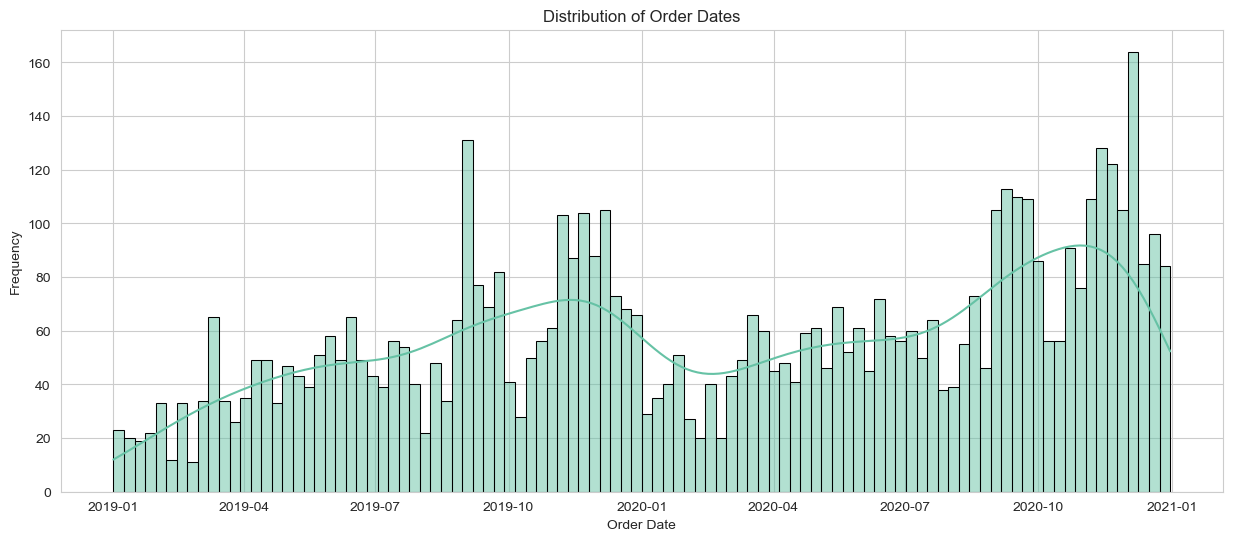

In [34]:
#Plotting distribution of Order Date
plt.figure(figsize=(15,6))
sns.histplot(df['Order Date'],kde=True,bins=100, edgecolor='k')
plt.title('Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Frequency')

### Sales Trend Analysis over time

#### Quarterly Sales Trend

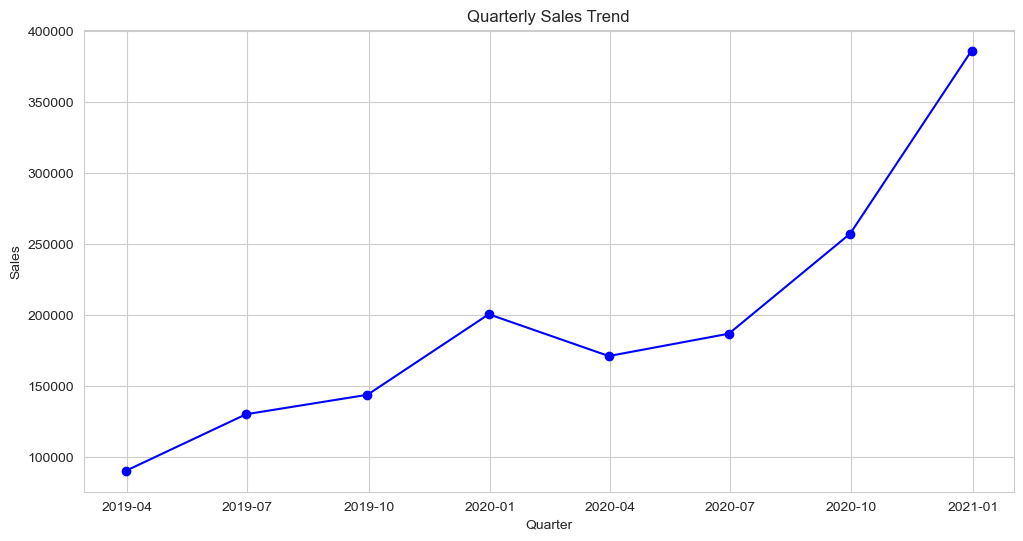

In [35]:
# Resample the data on a quarterly basis and calculate the total sales for each quarter
quarterly_sales = df.resample('Q', on='Order Date')['Sales'].sum()

# Plotting the quarterly sales trend
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### Monthly Sales Trend

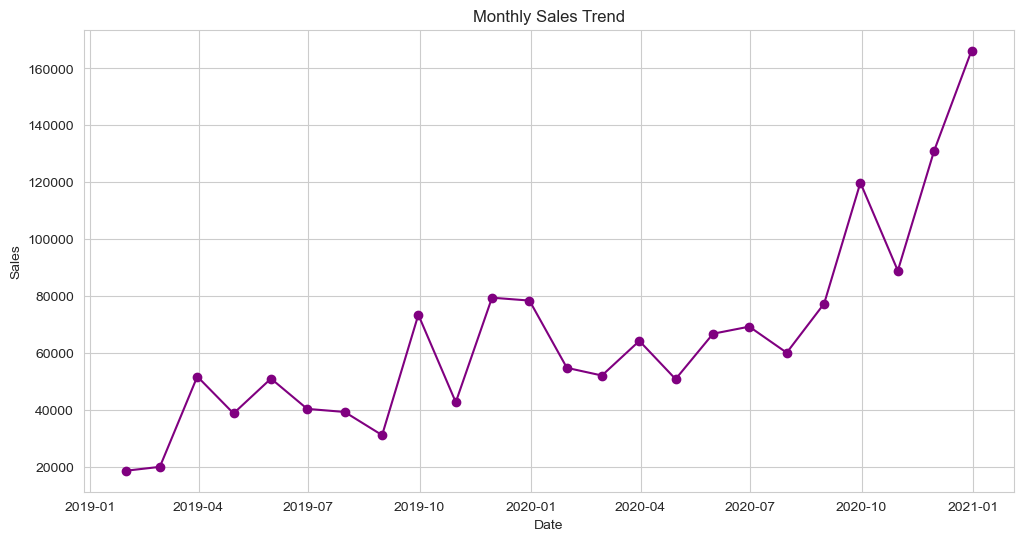

In [36]:
# Grouping data by 'Order Date' and calculating the total sales for each Order Date or 'monthly_sales'
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plotting the monthly_sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values,marker='o', linestyle='-', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#### Weekly Sales Trend

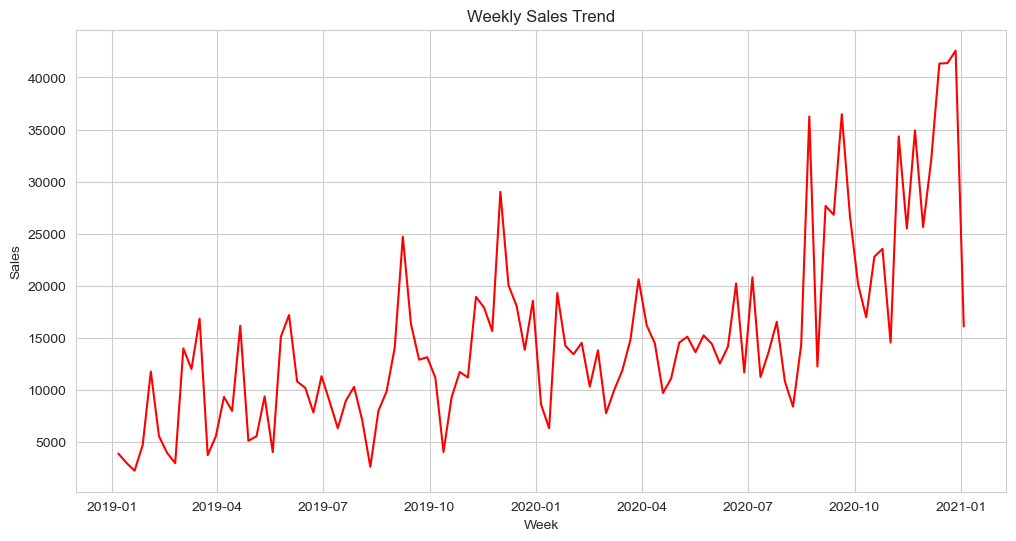

In [37]:
# Resample the data on a weekly basis (W) and calculate the total sales for each week
weekly_sales = df.resample('W', on='Order Date')['Sales'].sum()

# Plotting the weekly sales trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, color='r')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### Daily Sales Trend

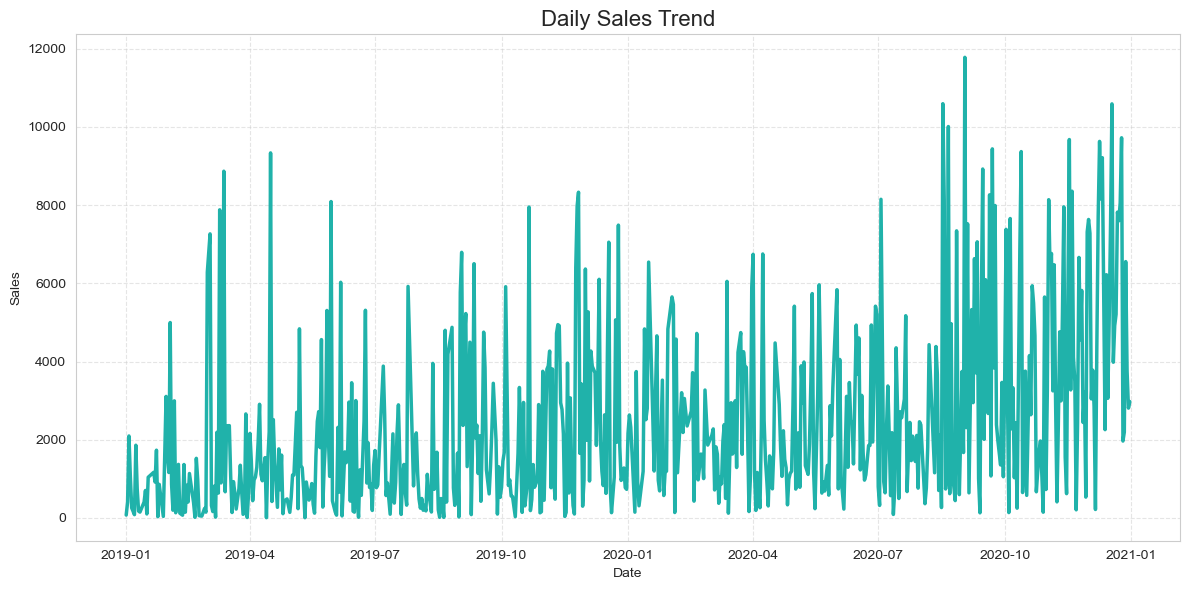

In [38]:
# Grouping data by 'Order Date' and calculating total sales for each date
daily_sales = df.groupby('Order Date')['Sales'].sum()

# Plotting the daily_sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, linewidth=2.5, color='lightseagreen')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, alpha=0.5, linestyle='--')  # Add gridlines with a dashed style
plt.tight_layout()  # Ensure all elements fit nicely
plt.show()

### Relationship between the order date and sales revenue

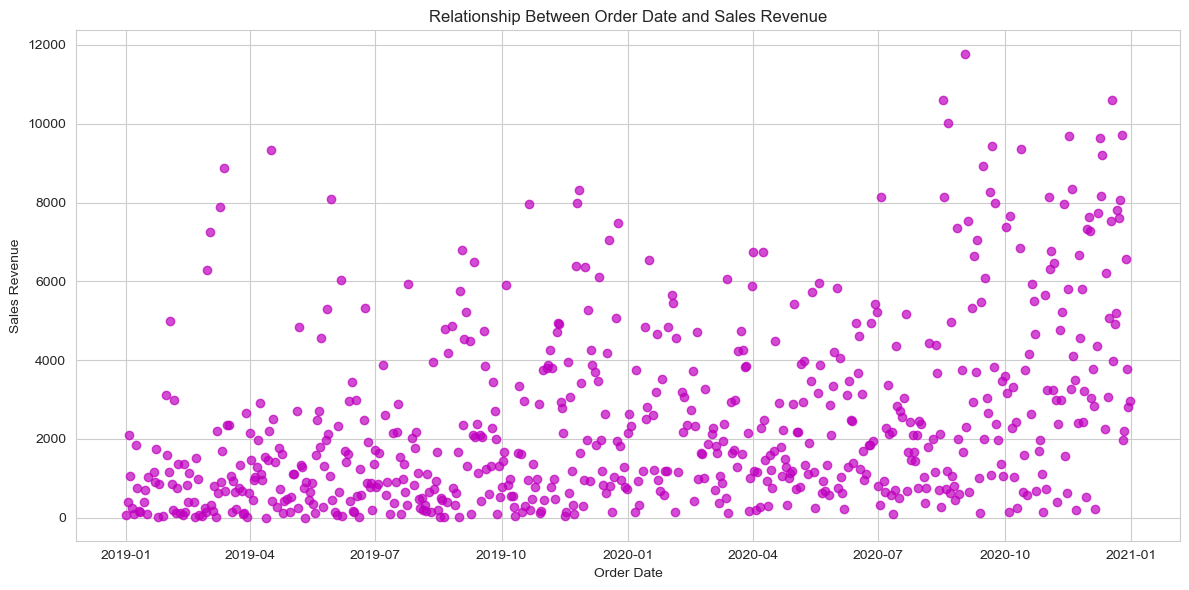

In [39]:
# Plotting the relationship between order date and sales revenue using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(daily_sales.index, daily_sales.values, color='m', alpha=0.7)
plt.title('Relationship Between Order Date and Sales Revenue')
plt.xlabel('Order Date')
plt.ylabel('Sales Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

### Any outliers in the sales data

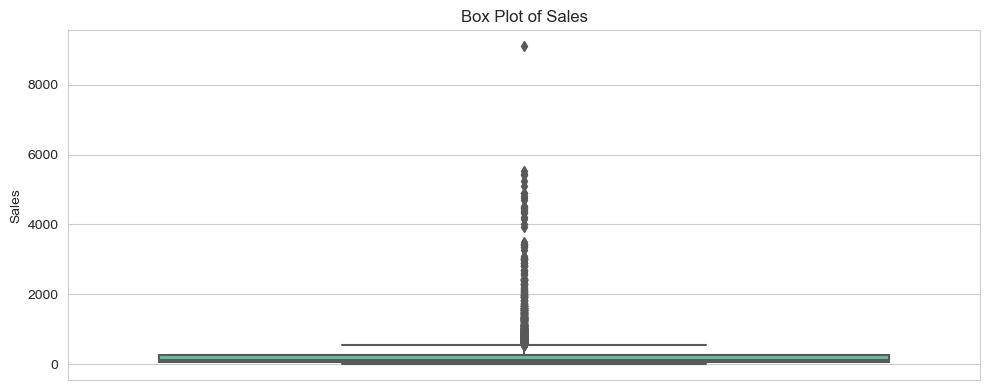

In [70]:
# Creating a box plot for sales
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Sales')
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

### Sales Trends Analysis

### The analysis of sales trends revealed significant spikes, particularly during holiday seasons towards the end of the year. This provides valuable insights for importance of effective inventory management during peak seasons and also offer valuable guidance for crafting targeted and impactful marketing strategies. Furthermore, it was established that the average shipping time for each order is approximately 4 days, reflecting the commitment to efficient order fulfillment and customer satisfaction.

### Variation of Average order value across different customer Payment Mode and Ship Mode

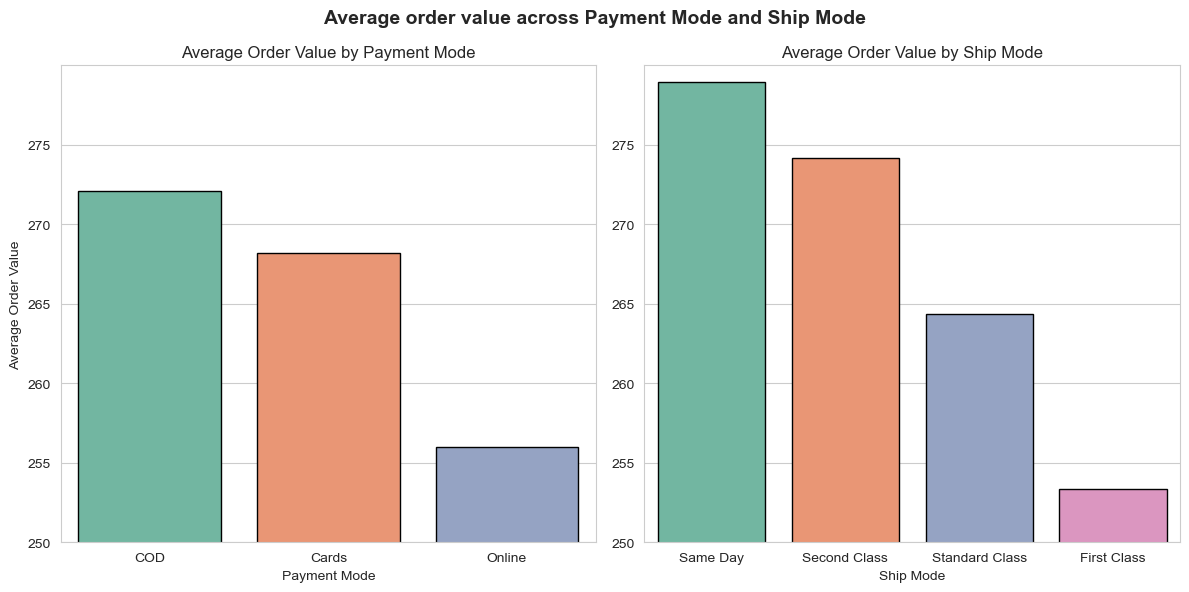

In [41]:
# Grouping data by 'Payment Mode' and calculating the average order value for each Payment Mode
payment_mode_avg_order_value = df.groupby('Payment Mode')['Sales'].mean().sort_values(ascending=False)

# Grouping data by 'Ship Mode' and calculating the average order value for each Ship Mode
ship_mode_avg_order_value = df.groupby('Ship Mode')['Sales'].mean().sort_values(ascending=False)

# Creating subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Average order value across Payment Mode and Ship Mode', fontsize=14, fontweight='bold')

# Subplot 1: Average Order Value by Payment Mode
sns.barplot(x=payment_mode_avg_order_value.index, y=payment_mode_avg_order_value.values, edgecolor='k', ax=axes[0])
axes[0].set_title('Average Order Value by Payment Mode')
axes[0].set_ylabel('Average Order Value')
axes[0].set_yticks(range(250, 280, 5))
axes[0].set_ylim(250, 280)

# Subplot 2: Average Order Value by Ship Mode
sns.barplot(x=ship_mode_avg_order_value.index, y=ship_mode_avg_order_value.values, edgecolor='k', ax=axes[1])
axes[1].set_title('Average Order Value by Ship Mode')
axes[1].set_yticks(range(250, 280, 5))
axes[1].set_ylim(250, 280)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

### Most profitable Segments and Regions

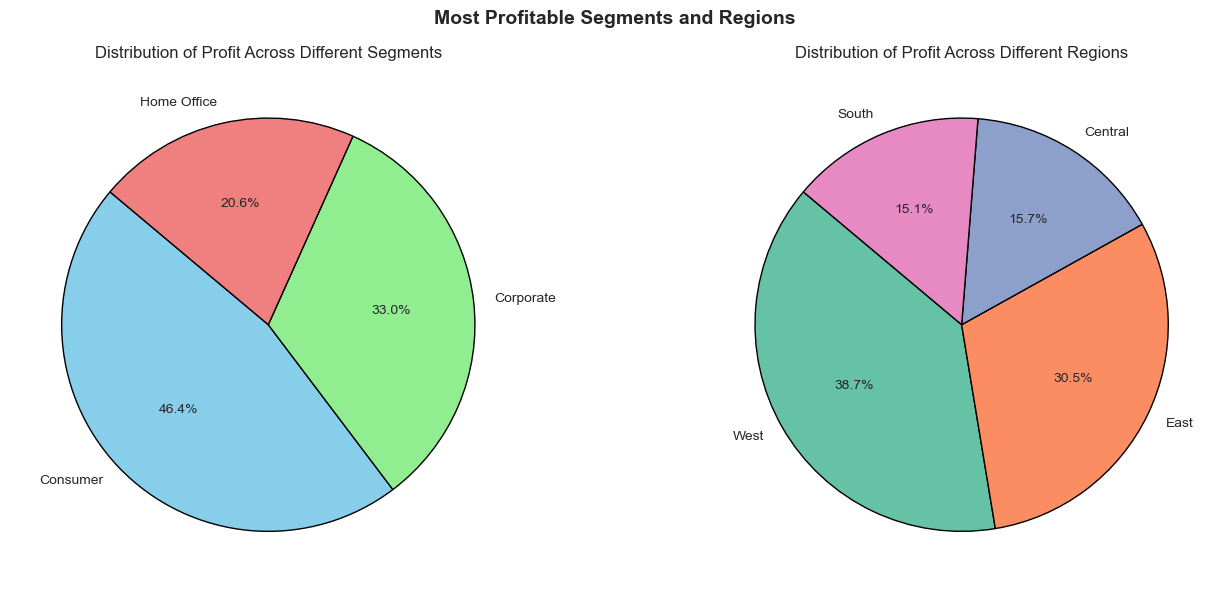

In [74]:
# Grouping data by 'Segment' and calculating the total profit for each Segment
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

# Grouping data by 'Region' and calculating the total profit for each Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Most Profitable Segments and Regions', fontsize=14, fontweight='bold')

# Subplot 1: Distribution of Profit Across Different Segments
colors_segment = ['skyblue', 'lightgreen', 'lightcoral'] # Custom colors for segments
axes[0].pie(segment_profit.values, labels=segment_profit.index, colors=colors_segment, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
axes[0].set_title('Distribution of Profit Across Different Segments')

# Subplot 2: Distribution of Profit Across Different Regions
axes[1].pie(region_profit.values, labels=region_profit.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
axes[1].set_title('Distribution of Profit Across Different Regions')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

### Profitability Analysis

### The comprehensive profitability analysis extended across products, categories, sub-categories, customer segments, and regions. This provided a holistic view, enabling a focus on high-margin products, profitable customer segments, and optimization in lucrative regions.

## Product Analysis

### Top 10 Most popular products in terms of the number of orders

In [43]:
# Grouping data by 'Product_Name' and calculating the count of unique orders for each product
most_popular_products = df.groupby('Product Name')['Order ID'].nunique().sort_values(ascending=False).head(10)
most_popular_products

Product Name
Easy-staple paper                                  27
Staples                                            24
Staple envelope                                    22
Staples in misc. colors                            13
Chromcraft Round Conference Tables                 12
Storex Dura Pro Binders                            12
Staple remover                                     12
Avery Non-Stick Binders                            11
Global Wood Trimmed Manager's Task Chair, Khaki    11
Sterilite Officeware Hinged File Box               10
Name: Order ID, dtype: int64

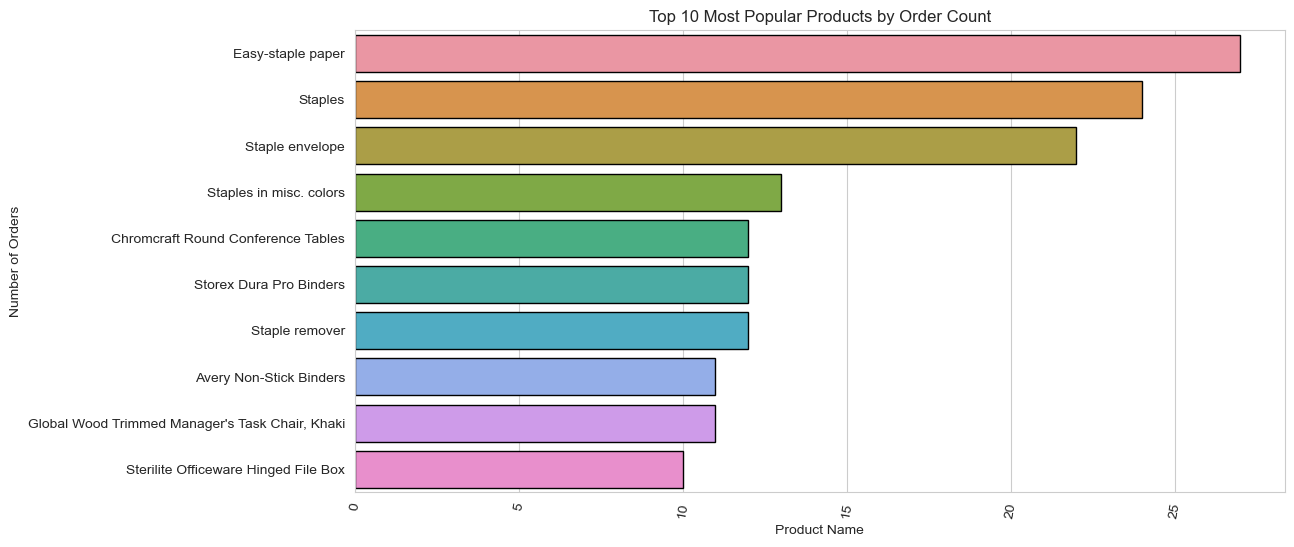

In [44]:
# Plotting Top 10 Most Popular Products by Order Count
plt.figure(figsize=(12, 6))
sns.barplot(x = most_popular_products.values, y = most_popular_products.index, edgecolor='k' )
plt.title('Top 10 Most Popular Products by Order Count')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=80)
plt.show()

### Top 10 Most Selling Products:

In [45]:
# Grouping data by 'Product_Name' and calculating the Sum of quantity for each product
most_selling_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
most_selling_products

Product Name
Staples                                                                 124
Easy-staple paper                                                        89
Staple envelope                                                          73
Staples in misc. colors                                                  60
Chromcraft Round Conference Tables                                       59
Storex Dura Pro Binders                                                  49
Situations Contoured Folding Chairs, 4/Set                               47
Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear     44
Avery Non-Stick Binders                                                  43
GBC Premium Transparent Covers with Diagonal Lined Pattern               42
Name: Quantity, dtype: int64

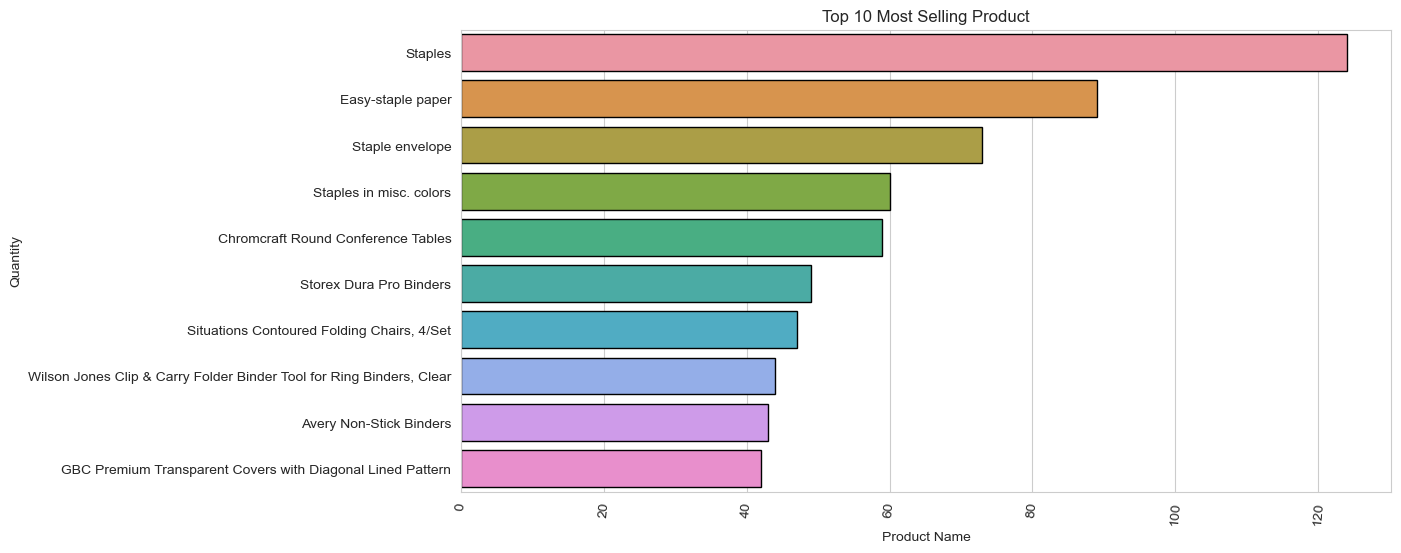

In [46]:
# Plotting Top 10 Most Selling Products by Quantity:
plt.figure(figsize=(12, 6))
sns.barplot(x = most_selling_products.values, y = most_selling_products.index, edgecolor='k' )
plt.title('Top 10 Most Selling Product')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=85)
plt.show()

### Top 10 Most Revenue Generating Products

In [47]:
# Grouping data by 'Product_Name' and calculating the Sum of Sales for each product
most_revenue_generating_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
most_revenue_generating_products

Product Name
3D Systems Cube Printer, 2nd Generation, Magenta                               14334.890
Canon imageCLASS 2200 Advanced Copier                                          14076.824
Hewlett Packard LaserJet 3310 Copier                                           13837.732
GBC DocuBind TL300 Electric Binding System                                     12890.258
GBC DocuBind P400 Electric Binding System                                      12577.108
Samsung Galaxy Mega 6.3                                                        12370.708
Martin Yale Chadless Opener Electric Letter Opener                             12268.902
HON 5400 Series Task Chairs for Big and Tall                                   11887.562
Global Troy Executive Leather Low-Back Tilter                                  10217.894
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     9756.524
Name: Sales, dtype: float64

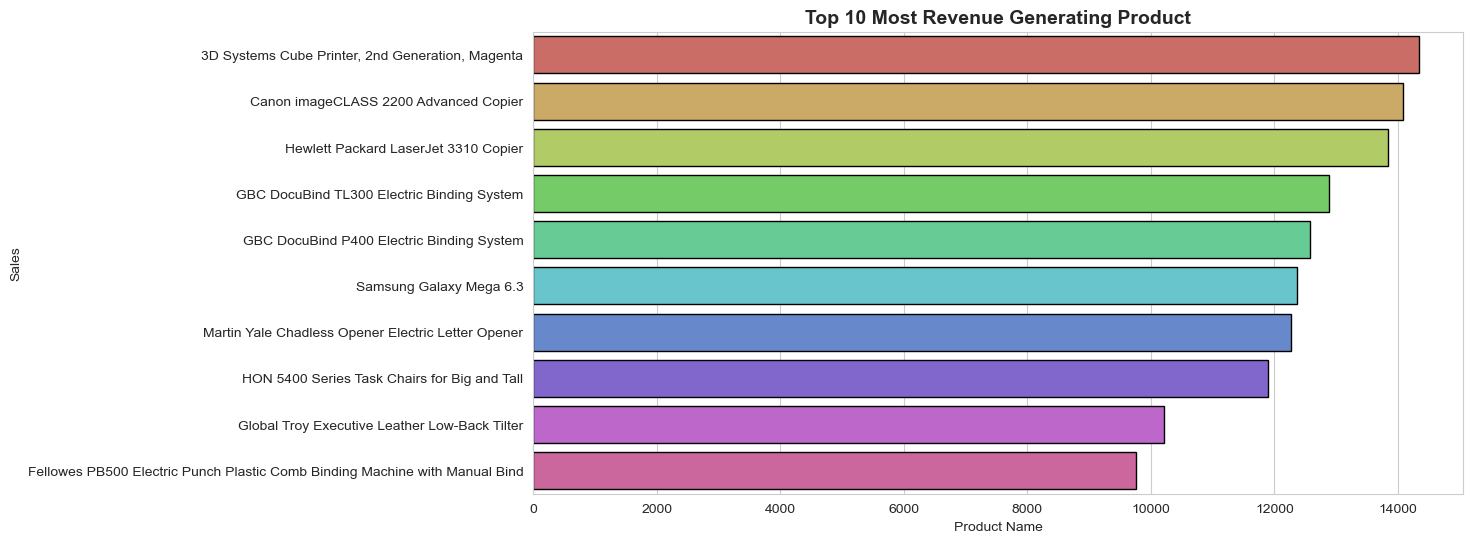

In [48]:
# Plotting Top 10 Most Revenue Generating Products
plt.figure(figsize=(12, 6))
sns.barplot(x = most_revenue_generating_products.values,y = most_revenue_generating_products.index,edgecolor='k',palette="hls")
plt.title('Top 10 Most Revenue Generating Product',fontsize=14, fontweight='bold')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

### Top 10 Most profitable products

In [49]:
# Grouping data by 'Product_Name' and calculating the Sum of Profit for each product
most_profitable_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
most_profitable_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                 25199.9280
Hewlett Packard LaserJet 3310 Copier                                   6407.8932
3D Systems Cube Printer, 2nd Generation, Magenta                       3717.9714
HP Designjet T520 Inkjet Large Format Printer - 24" Color              2799.9840
GBC DocuBind TL300 Electric Binding System                             2753.7593
Ativa V4110MDD Micro-Cut Shredder                                      2400.9657
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room     2396.1805
Plantronics CS510 - Over-the-Head monaural Wireless Headset System     2062.1875
Canon PC1060 Personal Laser Copier                                     1889.9730
Logitech Z-906 Speaker sys - home theater - 5.1-CH                     1847.9440
Name: Profit, dtype: float64

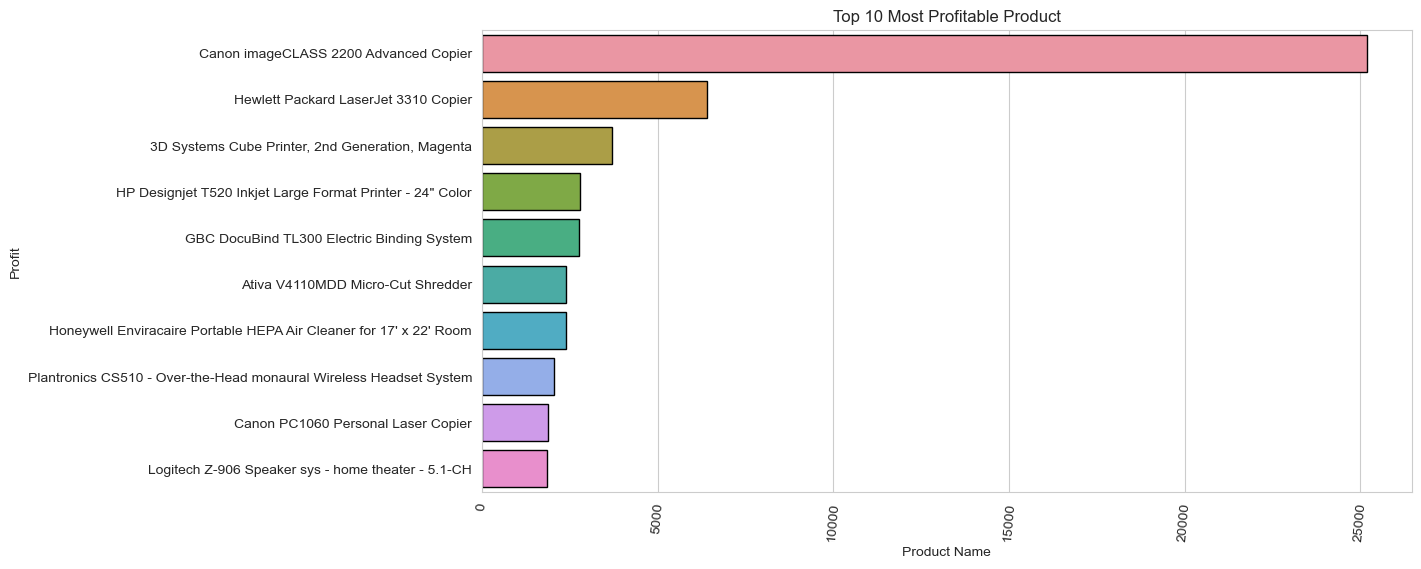

In [50]:
# Plotting Top 10 Most profitable product
plt.figure(figsize=(12, 6))
sns.barplot(x = most_profitable_products.values, y = most_profitable_products.index, edgecolor='k' )
plt.title('Top 10 Most Profitable Product')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation=85)
plt.show()

#### Lowest Profit Product

In [51]:
# Group data by 'Product Name' and calculate the total profit for each product
lowest_profit_product = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(5)
lowest_profit_product

Product Name
Ibico EPK-21 Electric Binding System                   -1285.1932
Bush Advantage Collection Racetrack Conference Table   -2019.2396
Lexmark MX611dhe Monochrome Laser Printer              -2719.9840
Cubify CubeX 3D Printer Triple Head Print              -3839.9904
Cubify CubeX 3D Printer Double Head Print              -6239.9792
Name: Profit, dtype: float64

### Top-selling Categories and sub-categories of products by Quantity Ordered, Sales Revenue and Profit

##### Type of Categories and sub-categories

In [52]:
# Categories
df['Category'].unique()

array(['Furniture', 'Technology', 'Office Supplies'], dtype=object)

In [53]:
# SubCategories
df['Sub-Category'].unique()

array(['Bookcases', 'Phones', 'Storage', 'Accessories', 'Tables',
       'Binders', 'Copiers', 'Art', 'Furnishings', 'Paper', 'Envelopes',
       'Chairs', 'Fasteners', 'Appliances', 'Labels', 'Machines',
       'Supplies'], dtype=object)

### Top-selling Categories of products by Quantity Ordered, Sales Revenue and Profit

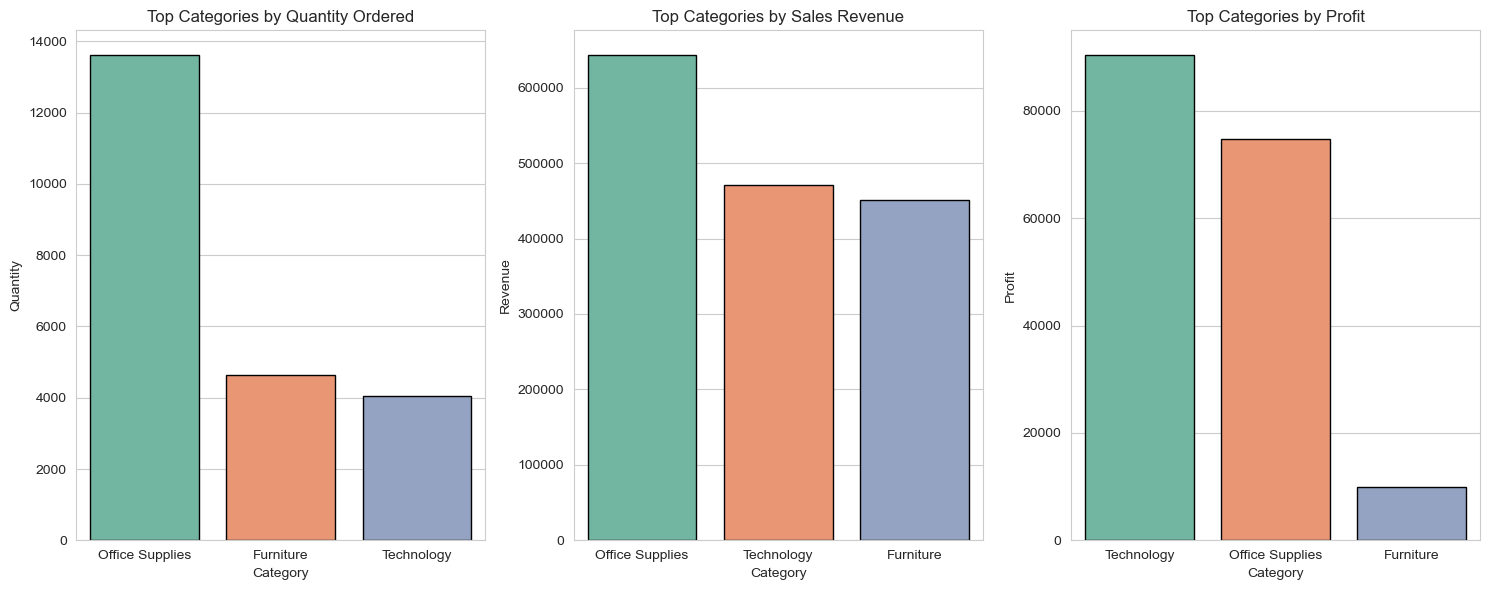

In [54]:
# Grouping data by 'categories' and calculating the total quantity, sales and profit for each category
top_cat_by_qty = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
top_cat_by_rev = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
top_cat_by_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Plotting a combined bar chart
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=top_cat_by_qty.index, y=top_cat_by_qty.values, edgecolor='k')
plt.title('Top Categories by Quantity Ordered')
plt.ylabel('Quantity')

plt.subplot(1, 3, 2)
sns.barplot(x=top_cat_by_rev.index, y=top_cat_by_rev.values, edgecolor='k')
plt.title('Top Categories by Sales Revenue')
plt.ylabel('Revenue')

plt.subplot(1, 3, 3)
sns.barplot(x=top_cat_by_profit.index, y=top_cat_by_profit.values, edgecolor='k')
plt.title('Top Categories by Profit')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

### Top-selling Sub-categories of products by Sales Volume, Revenue and Profit

#### Top-subcategories by Quantity Ordered

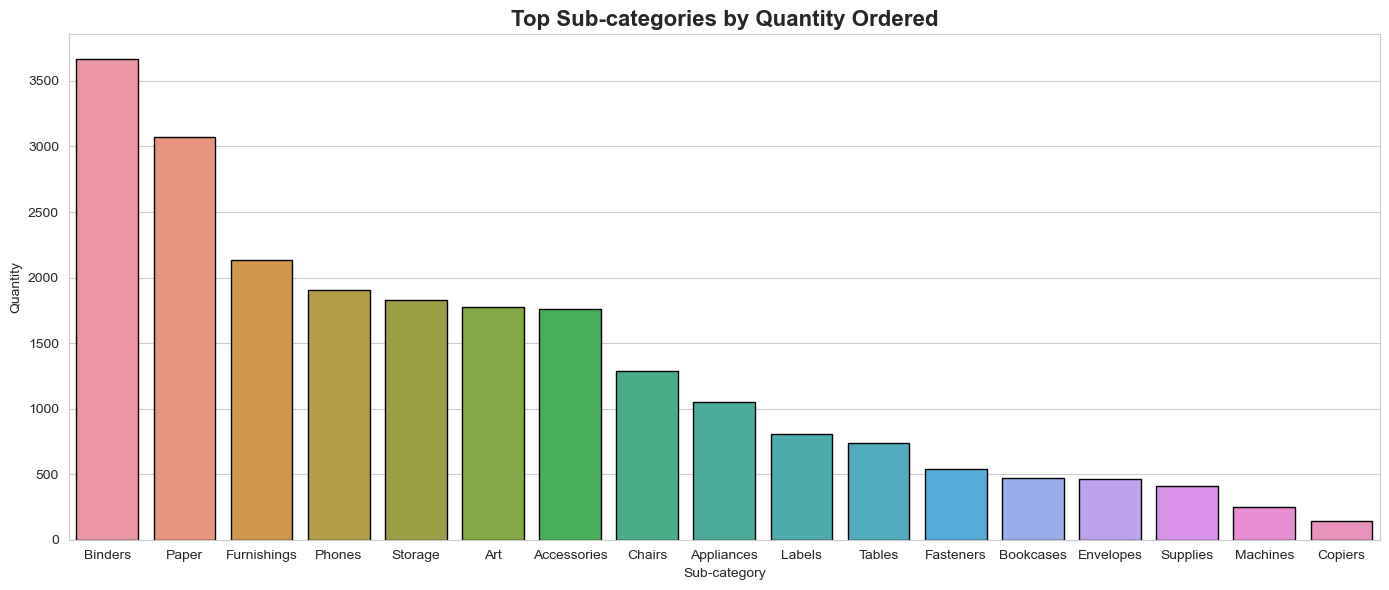

In [55]:
# Grouping data by 'Subcategory' and calculating the total quantity for each subcategory
top_subcategories_by_qty = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

# Plotting to visualize the distribution of Top-subcategories by Quantity Ordered
plt.figure(figsize=(14,6))
sns.barplot(x=top_subcategories_by_qty.index, y=top_subcategories_by_qty.values, edgecolor='k')
plt.title('Top Sub-categories by Quantity Ordered', fontsize=16, fontweight='bold')
plt.xlabel('Sub-category')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

#### Top-subcategories by Sales Revenue

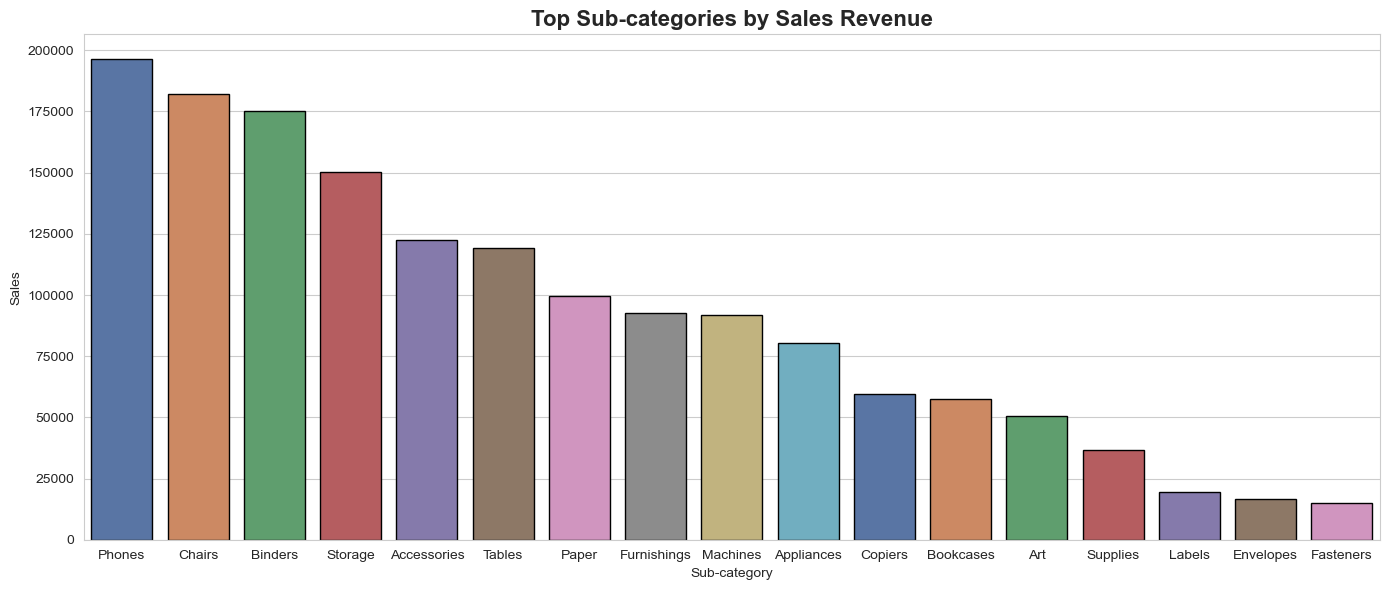

In [56]:
# Grouping data by 'Subcategory' and calculating the total sales for each subcategory
top_subcategories_by_revenue = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Plotting to visualize the distribution of Top-subcategories by Sales Revenue
plt.figure(figsize=(14,6))
sns.barplot(x=top_subcategories_by_revenue.index, y=top_subcategories_by_revenue.values, edgecolor='k', palette="deep")
plt.title('Top Sub-categories by Sales Revenue',fontsize=16, fontweight='bold')
plt.xlabel('Sub-category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

#### Top-subcategories by Profit

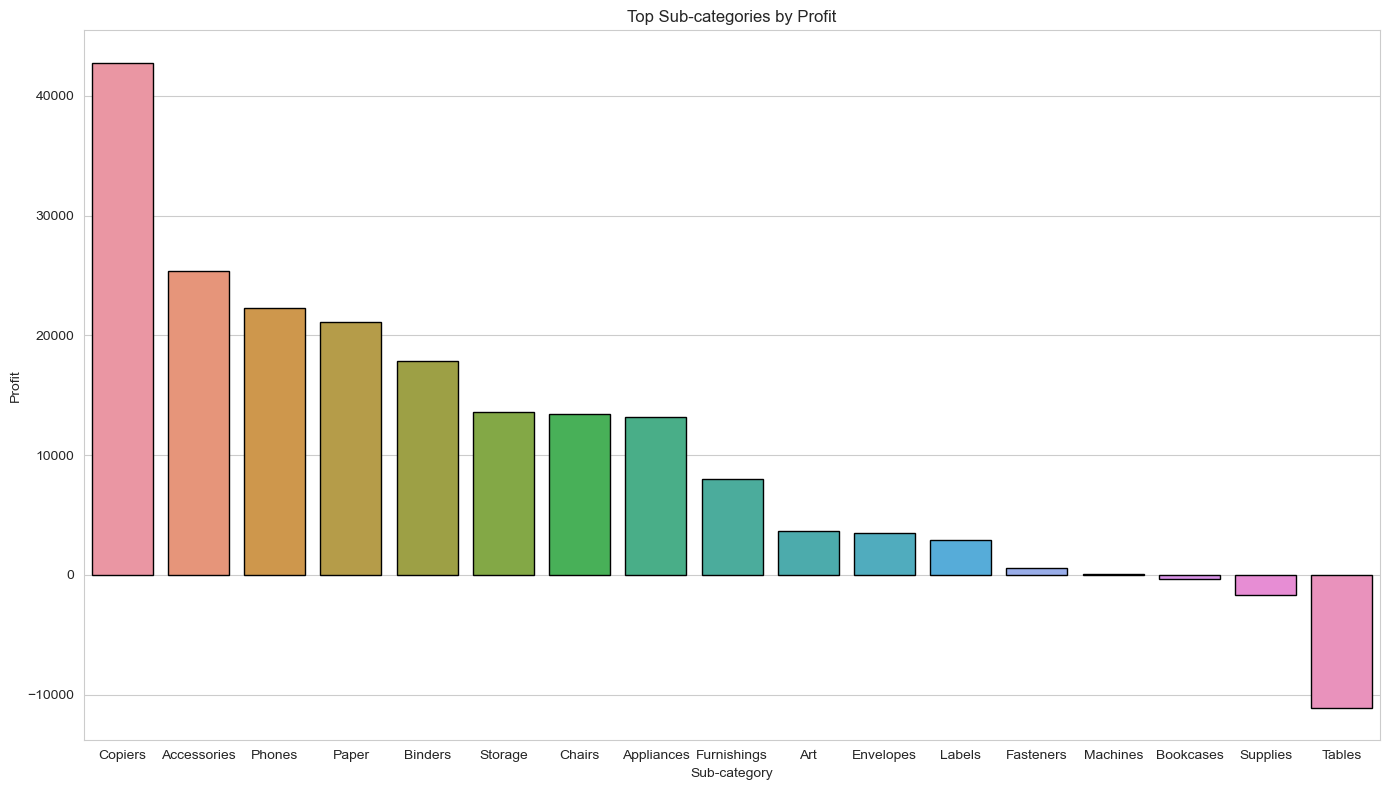

In [57]:
# Grouping data by 'Subcategory' and calculating the total profit for each subcategory
top_subcategories_by_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Plotting to visualize the distribution of Top-subcategories by Profit
plt.figure(figsize=(14,8))
sns.barplot(x=top_subcategories_by_profit.index, y=top_subcategories_by_profit.values, edgecolor='k')
plt.title('Top Sub-categories by Profit')
plt.xlabel('Sub-category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

#### Relationship between sales and quantity sold
<!--  Increased quantity sold does not leads to higher sales there are some outliers or patterns in the data. -->

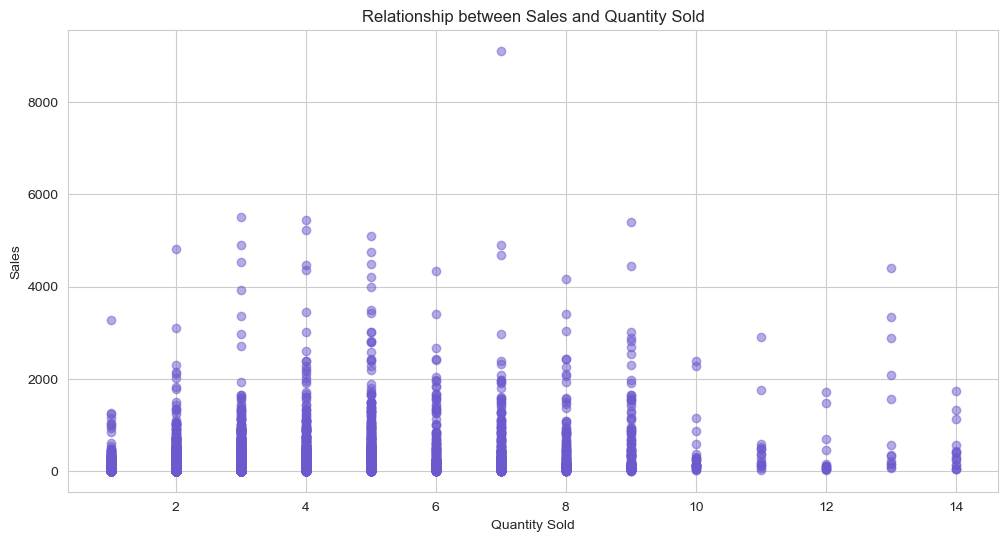

In [58]:
# Extract 'Sales' and 'Quantity' columns from your DataFrame
sales = df['Sales']
quantity = df['Quantity']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(quantity, sales, alpha=0.5, color='slateblue')
plt.title('Relationship between Sales and Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Product Performance Insights

### The analysis delved into the performance of various products, categories, and sub-categories, unearthing the top performers in multiple aspects.These insights are invaluable for optimizing inventory management strategies and crafting effective marketing marketing campaigns for maximum impact.

- Findings for products, categories, and sub-categories:

   - Top 10 Most Popular Products (by the number of orders) : Easy-staple paper

   - Top 10 Best-Selling (by quantity ordered) : Staples; Office Supply; Binders

   - Top 10 Revenue-Generating : 3D Systems Cube Printer, 2nd Generation, Magenta; Office Supply; Phones
   
   - Top 10 Most Profitable : Canon imageCLASS 2200 Advanced Copier; Technology; Copiers

## Geographic Analysis:

### Sales performance variation across different cities and state, Identifying top 10 cities and states

#### Top 10 States by Sales Performance

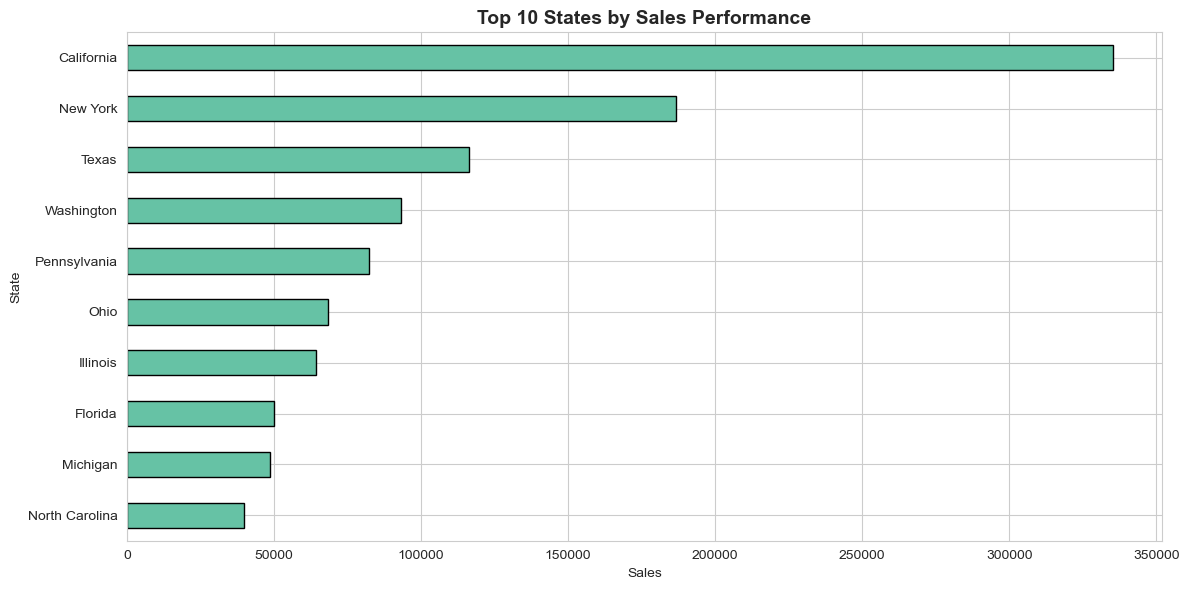

In [59]:
# Grouping data by 'State' and calculating total sales for each state
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting sales performance across states
top_states = state_sales.sort_values(ascending=True)
plt.figure(figsize=(12,6))
top_states.plot(kind='barh', edgecolor='k')
plt.title('Top 10 States by Sales Performance',fontsize=14, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### Top 10 Cities by Sales Performance

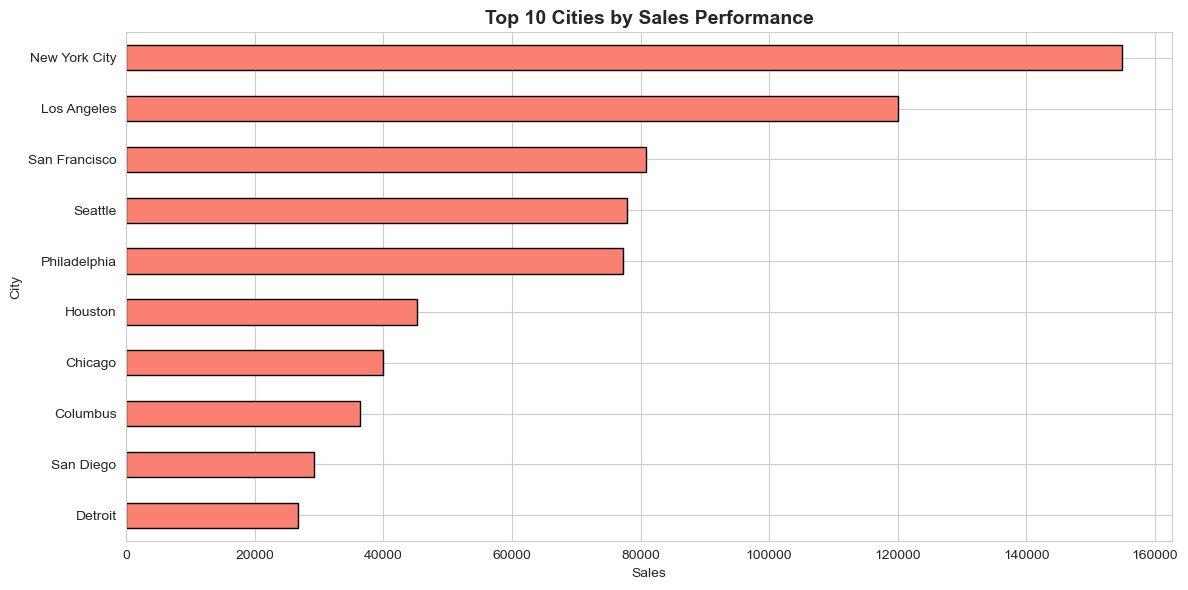

In [60]:
# Grouping data by 'City' and calculating total sales for each city
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting sales performance across cities
top_cities = city_sales.sort_values(ascending=True)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='barh', color='salmon', edgecolor='k')
plt.title('Top 10 Cities by Sales Performance',fontsize=14, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Regional Analysis

#### Ship mode most preferred by customers

In [61]:
# Most preferred Ship Mode
df['Ship Mode'].value_counts().idxmax()

'Standard Class'

#### Ship Mode preference across regions

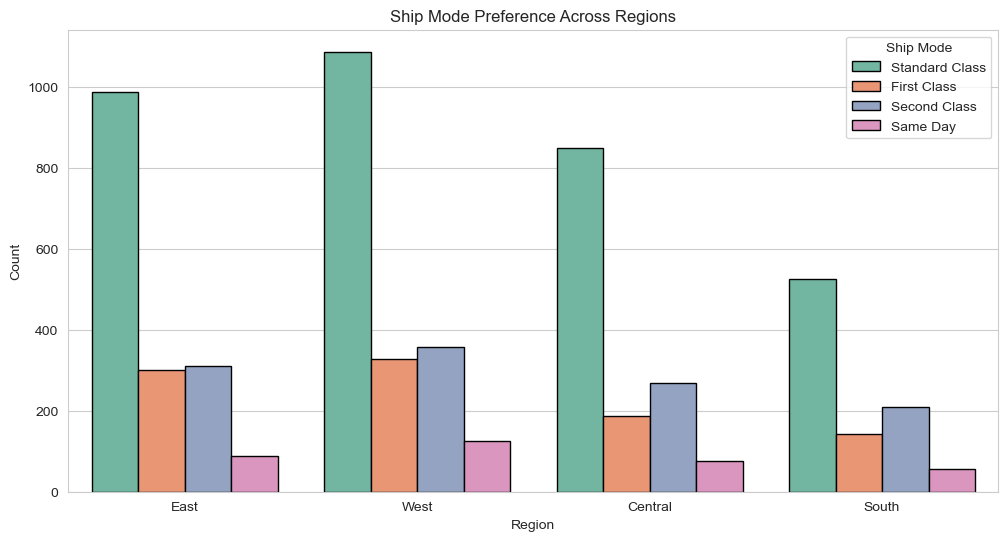

In [75]:
# Plotting the distribution of Ship Mode across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Ship Mode', edgecolor='k')
plt.title('Ship Mode Preference Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Ship Mode')
plt.show()

#### Payment mode most preferred by customers

In [63]:
# Most preferred Payment Mode:
df['Payment Mode'].value_counts().idxmax()

'COD'

#### Payment Mode preference across regions

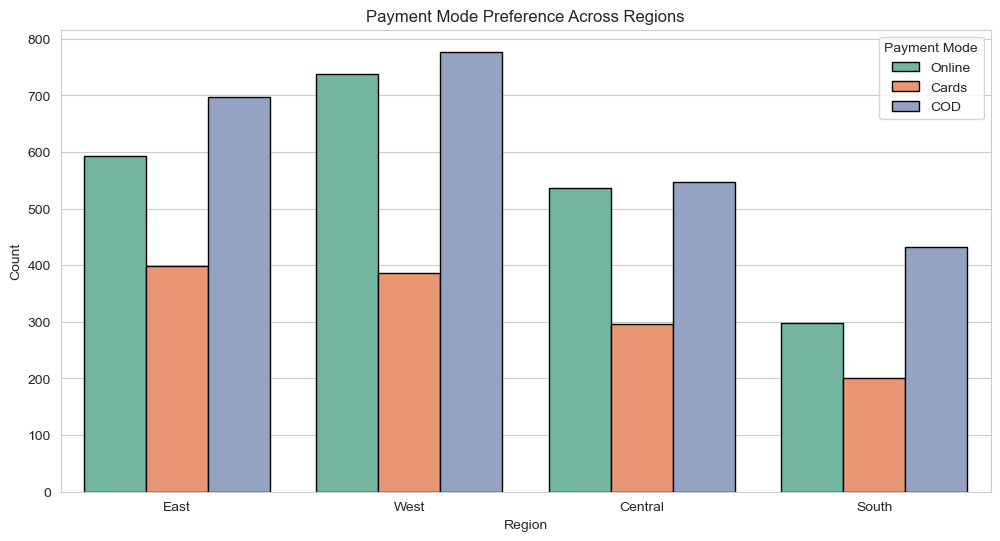

In [76]:
# # Plotting the distribution of Payment Mode across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Payment Mode', edgecolor='k')
plt.title('Payment Mode Preference Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Payment Mode')
plt.show()

#### Customer Segment most preferred by customers

In [65]:
# Most preferred Customer Segment:
df['Segment'].value_counts().idxmax()

'Consumer'

#### Segment preference across regions

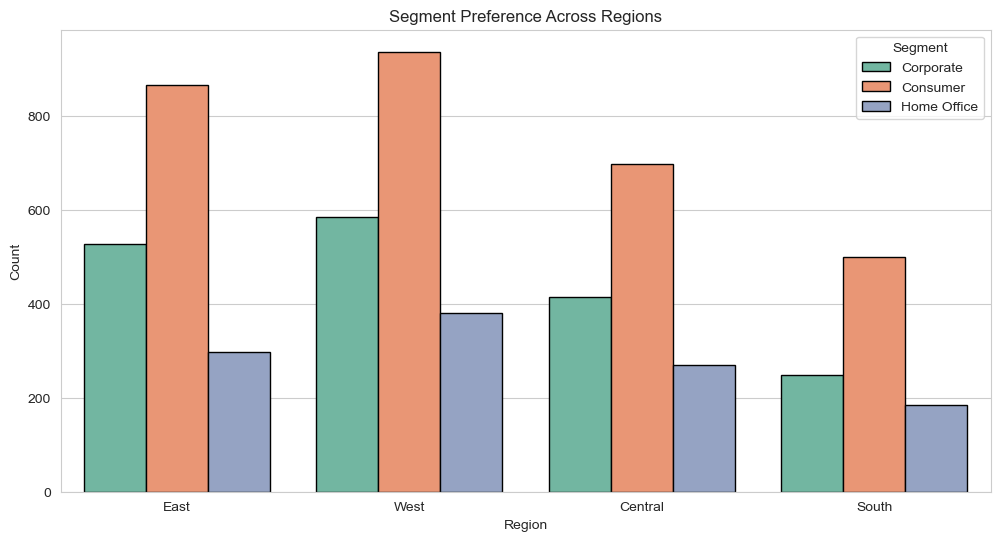

In [77]:
# Plotting the distribution of Customer Segment across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Segment', edgecolor='k')
plt.title('Segment Preference Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Segment')
plt.show()

### Geographical Insights

### The Geographical sales performance analysis across diverse regions, states, and cities has revealed valuable growth opportunities and regional disparities. Notably, California emerged as the top-performing state, while New York City claimed the title of the best-performing city. These findings provide crucial guidance for resource allocation, allowing us to focus our efforts strategically and maximize sales in specific geographic areas.

### Identifying high-value customers generating the most revenue for the superstore

In [67]:
# Grouping data by 'Customer_ID' and calculating total sales (revenue) for each customer
top_customers = df.groupby(['Customer ID', 'Customer Name'])['Profit'].sum().sort_values(ascending=False).head(10)
top_customers

Customer ID  Customer Name
TC-20980     Tamara Chand     8764.9483
RB-19360     Raymond Buch     6976.0959
HL-15040     Hunter Lopez     5174.3968
AB-10105     Adrian Barton    5088.9448
TA-21385     Tom Ashbrook     4523.3625
AR-10540     Andy Reiter      2617.2154
DR-12940     Daniel Raglin    2549.7344
SE-20110     Sanjit Engle     2436.9525
BS-11365     Bill Shonely     2405.3645
KD-16270     Karen Daniels    2318.7099
Name: Profit, dtype: float64

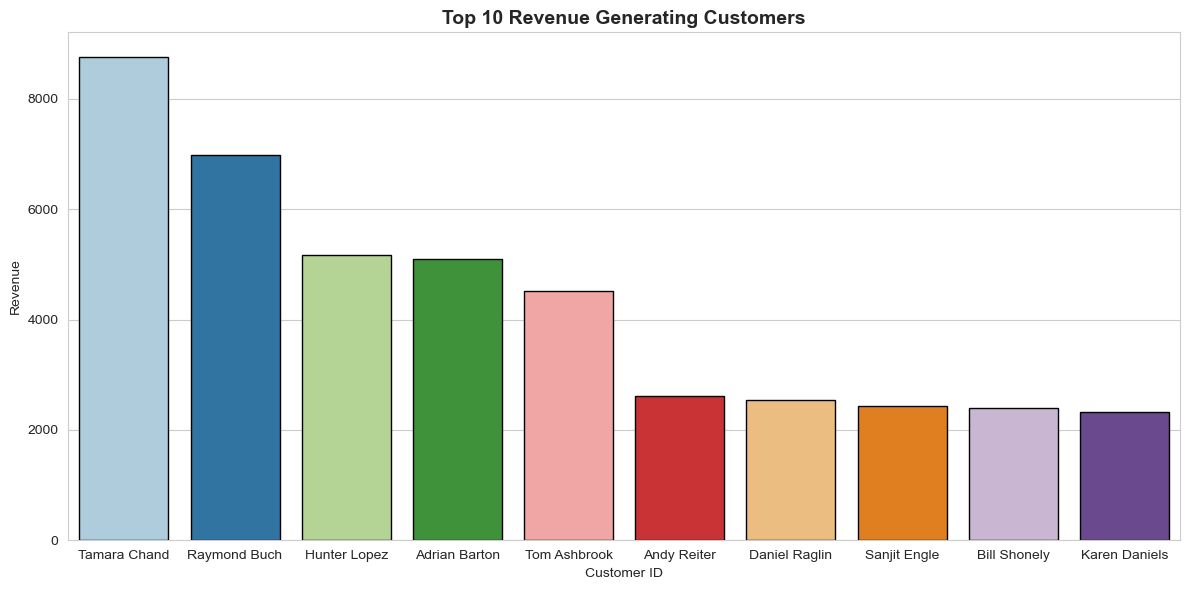

In [78]:
# Plotting the top 10 revenue-generating customers
top_customers_name = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers_name.index, y=top_customers_name.values, edgecolor='k', palette="Paired")
plt.title('Top 10 Revenue Generating Customers',fontsize=14, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

### Customer Segmentation

### The customers segmentation are based on their purchasing behavior, enabling the identification of high-value customer segments. This segmentation serves as the foundation for personalized marketing efforts, enhancing customer engagement and loyalty.

### In conclusion, this project provided a comprehensive analysis of sales data for a superstore, offering valuable insights into sales trends, product performance, customer behavior, and regional variations. The findings highlighted the significance of effective inventory management during peak seasons, the importance of data-driven decision-making, and the potential for targeted marketing strategies. By identifying top-performing products, high-value customer segments, and lucrative regions, this analysis equips the superstore with the tools needed to optimize operations, enhance customer engagement, and boost profitability. The commitment to efficient order fulfillment, as reflected in the average shipping time, underscores the dedication to customer satisfaction. This project lays the foundation for data-driven decisions and strategies that will drive the superstore's success in the highly competitive retail landscape.